<a href="https://colab.research.google.com/github/menon92/DL-Sneak-Peek/blob/master/%E0%A6%9F%E0%A7%87%E0%A6%A8%E0%A7%8D%E0%A6%B8%E0%A6%B0%E0%A6%AB%E0%A7%8D%E0%A6%B2%E0%A7%8B_%E0%A7%A8_%E0%A7%A6_%E0%A6%93_%E0%A6%95%E0%A7%87%E0%A6%B0%E0%A6%BE%E0%A6%B8_%E0%A6%AA%E0%A6%B0%E0%A6%BF%E0%A6%9A%E0%A6%BF%E0%A6%A4%E0%A6%BF_%E0%A6%AA%E0%A6%B0%E0%A7%8D%E0%A6%AC_%E0%A7%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ইমেজ ডাটা - ২য় পর্ব
`keras.preprocessing` দিয়ে ইমেজ ডাটা লোড করা। আমরা <a herf="https://keras.io/preprocessing/image/"> ImageDataGenerator </a> ব্যাবহার করে খুব সহজেই ইমেজ লোড করতে পারি । `rescale=1./255` দিয়ে আমরা বলে দিচ্ছি ইমেজের পিক্সেল ভেলু গুলোকে [0,255] থেকে [0,1] মাঝে নিয়ে আসা । 

In [0]:
try:
  # %tensorflow_version এই কমান্ড কেবলমাত্র colab এ কাজ করে লোকাল নোটবুকে কাজ করবে না । 
  # এই জন্য try except ব্যাবহার করা হয়েছে । 
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [12]:
# আগের মতই ডাটাসেট ডাউনলোড করা
DATASET_URL = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

data_dir = tf.keras.utils.get_file(origin=DATASET_URL, fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)
print('Dataset directory:', data_dir)

Dataset directory: /root/.keras/datasets/flower_photos


In [13]:
# print total number of image present in this dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [0]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

ইমেজ ডাটা লোড করার জন্য আমরা কিছু প্যারামিটার ডিফাইন করি । 

In [0]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

এখন আমরা ডাটা ডিরেক্টরি থেকে ৫ টা ক্লাসের নাম বের করে ফেলি ।  

In [16]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses'],
      dtype='<U10')

In [17]:
train_data_gen = image_generator.flow_from_directory(
    directory=str(data_dir),
    batch_size=BATCH_SIZE,
    color_mode='rgb', # one of "grayscale", "rgb", "rgba". Default: "rgb". 
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    classes = list(CLASS_NAMES),
    class_mode='categorical' # "categorical", "binary", "sparse", "input", or None. Default: "categorical".
)

Found 3670 images belonging to 5 classes.


আমরা যেহেতু ইমেজ ডিরেক্টরি থেকে ডাটা লোড করব এইজন্য `flow_from_directory` করেছি । পাণ্ডা ডাটা ফ্রেম থেকে লোড করতে হলে `flow_from_dataframe` ব্যাবহার করতে হবে । আপনি `flow_from_directory` এর ফুল ফাংশন ডেফিনেসন এই থেকে দেখে নিতে পারেন । উপরে যে প্যারামিটার ব্যাবহার করা হয়েছে তার কোনটা কি কাজ করছে সটা নিচে দেয়া হল । 

- `directory` ৫ টা ফুলের ডিরেক্টরি যেটা সেটা এখানে দিতে হবে । 
- `batch_size` প্রতিবার কয়টা করে ছবি প্রসেস করে রিটার্ন করবে সেটা বলে দিচ্ছি । 
- `color_mode` ছবি সাদাকালো না রঙ্গিন সেটা বলে দিচ্ছি । 
- `shuffle` ডাটা কি প্রতিবার সাফল হবে কি না সেটা বলে দিচ্ছি । 
- `target_size` আমরা আগে দেখেছিলাম এক একটা ছবির সাইজ এক এক রকম । সেটা ফিক্স একটা সাইজে নিয়ে আসার জন্য টার্গেট সাইজ বলে দিচ্ছি । 
- `classes` ক্লাসের নাম লিস্ট আকারে দিতে হবে । 
- `class_mode='cagegorical'` যেহেতু আমাদের লেবেল ওয়ান হট চাই এই জন্য cagegorical ব্যাবহার করেছি + আমাদের ডাটা ক্যাটাগরিকেল ডাটা। 

## One-Hot এনকোডিং কি 

মনে করা আপনার ৩ টা ক্লাস আছে । ক্লাস গুলো হল A, B, C এই তিনটার লেবেল যথাক্রমে 0, 1, 2 । এখন A এর লেবেল 0 কে আমরা যদি one-hot এনকোডিং এ রিপ্রেজেন্ট করতে চাই তাহলে লিখতে হবে । `label of A = [1, 0, 0]`, `label of B = [0, 1, 0]`, `label of C = [0, 0, 1]` 

এখানে লক্ষণীয়ে যে আমরা যে লিস্ট লেখেছি তার সাইজ ৩ । কারণ আমার মোট ক্লাস ৩ আমাদের যদি ৫ টা ক্লাস থাকে তাহলে সাইজ হবে ৫ অর্থাৎ ক্লাস n হলে সাইজ n হবে । আর একটা বিষয় লক্ষণীয় যে আমাদের লেবেলের মান যত আমরা লিস্টের তত তম ইনডেক্সের মান ১ করে দিয়েছি এবং বাকি ইনডেক্সগুলো মান ০ সেট করে দিয়েছি । 

যখন কোন লেবেল কে এই ভাবে রিপ্রেজেন্ট করা হয় তখন তাকে বলা হয় One-Hot এনকোডিং । এখন প্রশ্ন হল এটা কেন করা হয় ? এটা করা হয় কারণ মডেল ট্রেনিং করার সময় যখন `crossentropy` লস হিসাবে করা হয় তখন লেবেল যদি One-Hot এনকোডিং ফরমেটে থাকে তাহলে লস কম্পিউটেশন খুব দ্রুত হয় । কেন দ্রুত হয় সেটা বুঝতে হলে আপনাকে `crossentropy` কিভাবে কাজ করে সেটা বুঝতে হবে । এই জন্য আপনি <a href="https://www.youtube.com/watch?v=tRsSi_sqXjI"> Cross Entropy</a> এই  ভিডিও দেখতে পারেন । 

image shape (224, 224, 3)  one hot label [0. 0. 1. 0. 0.]


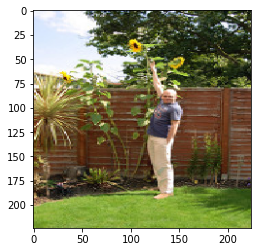

image shape (224, 224, 3)  one hot label [0. 0. 1. 0. 0.]


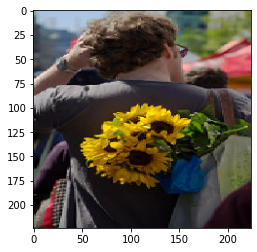

image shape (224, 224, 3)  one hot label [0. 0. 0. 0. 1.]


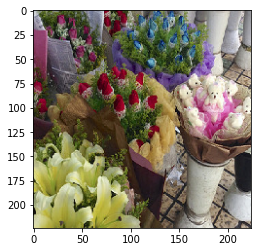

In [18]:
# take batch image using `next`
image_batch, label_batch = next(train_data_gen)

for image, label in zip(image_batch[:3], label_batch[:3]):
    print('image shape', image.shape, ' one hot label', label)
    plt.imshow(image)
    plt.show()

এখন আমরা দেখতে পাচ্ছি যে ছবিগুলো আমাদের দেয় সাইজে কনভার্ট হয়ে গিয়েছে এবং এবং লেবেল টা one-hot এ কনভার্ট হয়ে গিয়েছে । এখন আমরা দেখব এটা ব্যাচ (৩২) যতগুলো ছবি আছে সবগুলো প্লট করে দেখি । 

In [0]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(16, 8))
    for n in range(32):
        ax = plt.subplot(4, 8, n+1)
        plt.imshow(image_batch[n])
        class_name = CLASS_NAMES[label_batch[n]==1][0].title()
        plt.title(class_name)
        plt.axis('off')

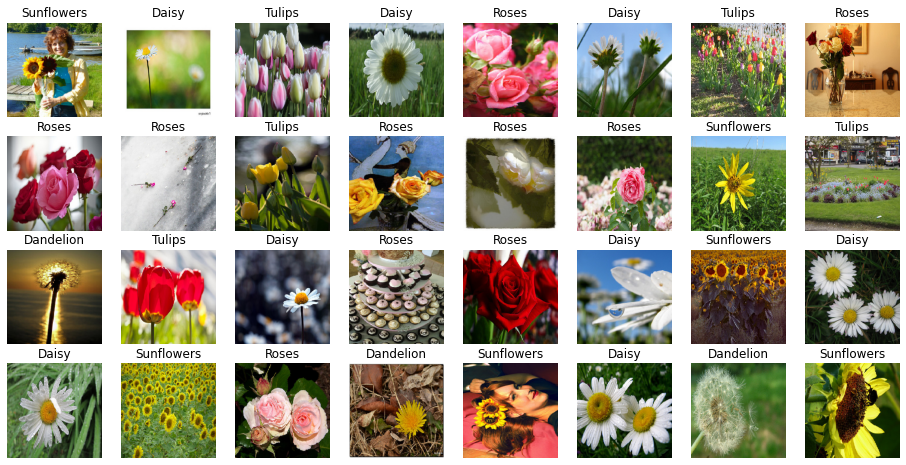

In [20]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

এখন ডাটাটা CNN নেটওয়ার্ক ট্রেনিং করার জন্য ফুল রেডি । উপরের কোড টা প্রতিবার রান করলে দেখবেন ভিন্ন ভিন্ন ছবি আসতেছে । এর কারণ আমরা `shuffle=True` সেট করে দিয়েছি । যার কারণে প্রতিবার ডাটা লোড করার আগে ডাটা সাফল করে নিচ্ছে । পরের পর্বে আমরা দেখব `tf.data` ব্যাবহার করে কিভাবে ইমেজ ডাটা লোড করা যায় । 